<img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >

# Normality check

**The objective of this work is to check if stocks returns are normally distributed**

Import the required packages

In [29]:
import pandas as pd
import yfinance as yf
import scipy.stats as scs
import statsmodels.api as sm
import numpy as np
import math
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

Select the stocks to work

In [39]:
symbols = ["SPY", "AAPL", "MSFT"]

Download the Prices from Yahoo Finance

In [64]:
data = yf.download(symbols, start="2020-01-01", end="2020-04-30")
data = data['Close']

[*********************100%***********************]  3 of 3 completed


Calculate the daily returns

In [ ]:
returns = np.log(data / data.shift(1)).dropna()
returns.head()

Graph the cummulative return to check the data

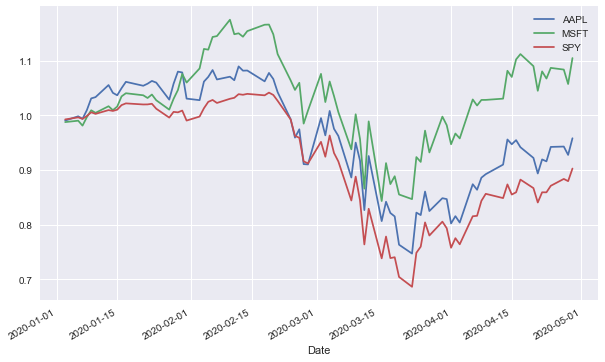

In [41]:
returns.cumsum().apply(np.exp).plot(figsize=(10,6));

Calculate the annualized return

In [42]:
returns.mean()*252

AAPL   -0.133547
MSFT    0.309664
SPY    -0.319001
dtype: float64

Calculate the annualized Standard Deviation

In [43]:
returns.std()*math.sqrt(252)

AAPL    0.629797
MSFT    0.651721
SPY     0.528598
dtype: float64

In [52]:
def dN(x,mu,sigma):
    '''Probability density function of a normal
    random variable
    '''
    z = (x - mu) / sigma
    pdf=np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

In [55]:
def return_histogram(rets):
    '''Plot a Histogram of the returns
    '''
    plt.figure(figsize=(10,6))
    x = np.linspace(min(rets), max(rets), 100)
    plt.hist(np.array(rets), bins=50, density=True)
    y = dN(x, np.mean(rets), np.std(rets))
    plt.plot(x, y, linewidth = 2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)

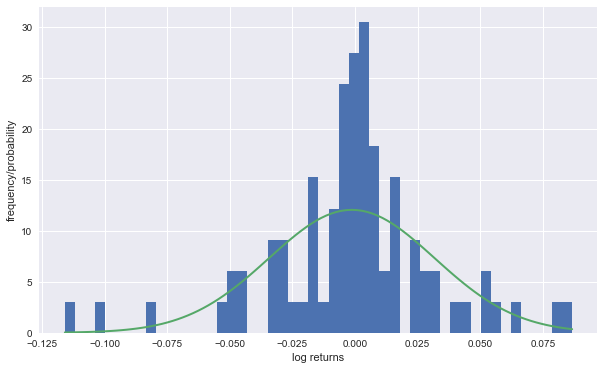

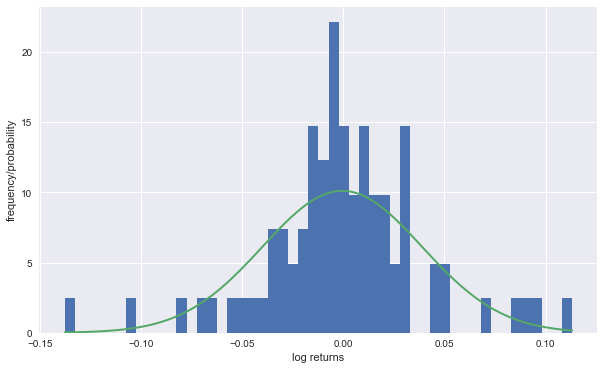

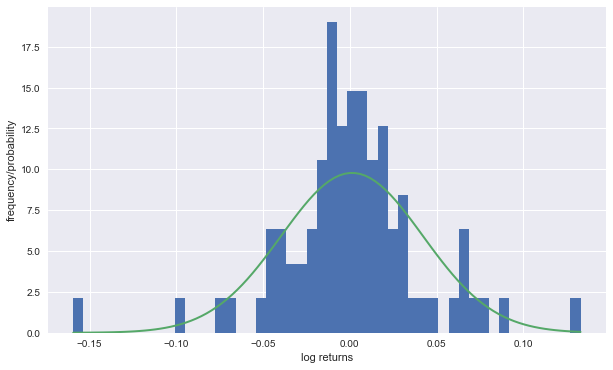

In [54]:
for sym in symbols:
    return_histogram(returns[sym].values)

## QQ Plot Analysis

>The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

Source: https://data.library.virginia.edu/understanding-q-q-plots/

Define function to create QQ plots

In [56]:
def return_qqplot(rets):
    '''Generates a Q-Q plot of the returns
    '''
    sm.qqplot(rets, line='s')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sameple Quantiles')

Create QQ Plots

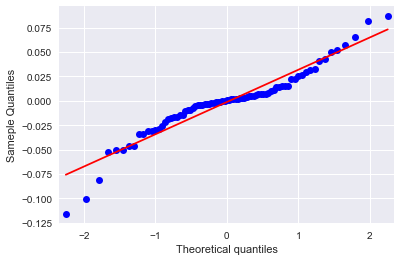

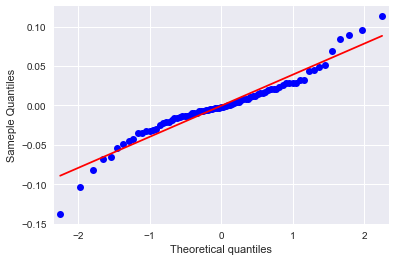

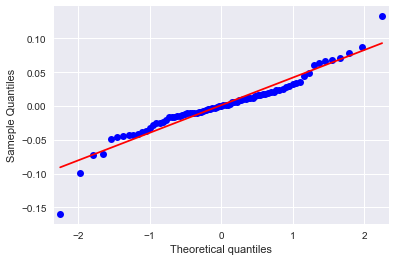

In [58]:
for sym in symbols:
    return_qqplot(returns[sym].values)

## Statistical Normality Test

Define the function with the statistics to test whether a sample differs from a normal distribution.

In [59]:
def print_statistics(rets):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(rets))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(rets)[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(rets))
    print("Kurt Normal Test p-value   %9.6f" % \
                scs.kurtosistest(rets)[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" % \
                scs.normaltest(rets)[1])
    print("---------------------------------------------")

Execute the function to check the Normality

In [61]:
for sym in symbols:
    print('\n{}'.format(sym))
    print(45 * '=')
    print_statistics(returns[sym].values)


SPY
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.459570
Skew Normal Test p-value    0.079823
---------------------------------------------
Kurt of Sample Log Returns  2.244674
Kurt Normal Test p-value    0.004428
---------------------------------------------
Normal Test p-value         0.003758
---------------------------------------------

AAPL
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.160394
Skew Normal Test p-value    0.527583
---------------------------------------------
Kurt of Sample Log Returns  2.107424
Kurt Normal Test p-value    0.005871
---------------------------------------------
Normal Test p-value         0.018420
---------------------------------------------

MSFT
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.294491
Skew Normal Test p-value    0.251456
---------------------------------------------
Kurt